In [1]:
import sys
sys.path.append('../source/')
import numpy as np
from Users import Users
from Producers import *
from embeddings import *
from sklearn.preprocessing import normalize
from plotting import *
from tqdm import tqdm
import pandas as pd

ModuleNotFoundError: No module named 'cvxpy'

In [91]:
!pwd

/Users/krishna/Documents/Research/StrategicML/RecSys/recsys-code/recsys_eq/plots


In [8]:
import sys
sys.path.append('../source/')
import numpy as np
from Users import Users
# from Producers import *
from embeddings import *
from sklearn.preprocessing import normalize
from plotting import *
from tqdm import tqdm
import pandas as pd

In [9]:
# utils_columns = ['total_prod_util','avg_prod_util', 'max_prod_util', 'min_prod_util', \
#                  'total_user_util','avg_user_util','max_user_util', 'min_user_util']
utils_columns = ['avg_prod_util', 'min_prod_util', 'avg_user_util', 'min_user_util']
distributions = ['user_dist', 'producer_dist']

### UNIFORM SYNTHETIC
- 399 instances conveged to NE for linear, all 400 converged for softmax
- Of those 399 instances, Linear is better than softmax for both producer and user utilities (except for 2 instances for the max_user_util column)

In [15]:
df_linear = pd.read_pickle("../saved_frames/uniform_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/uniform_synthetic_grid_softmax_statistics.pkl") 

In [11]:
NE_mask = df_linear['NE_exists']
(df_linear[NE_mask][utils_columns] - df_softmax[NE_mask][utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,399.000000,399.000000,399.000000,399.000000
mean,19.842705,18.974458,0.068437,0.049992
std,20.078576,19.019626,0.023730,0.024368
min,4.222688,4.136017,0.038868,0.000484
25%,7.909494,7.760211,0.046548,0.027502
50%,12.316220,12.065529,0.071895,0.054302
75%,21.364928,20.499442,0.088680,0.067307
max,106.081976,102.894447,0.106082,0.090755


In [12]:
df_linear[df_linear['NE_exists'] == False]

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
270,15,19,10,False,9999,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, ...","[0.06638044181189726, 0.0664076402597995, 0.06...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
df_linear.columns

Index(['dimension', 'seed', 'nprod', 'NE_exists', 'iters',
       'last_profile_compact', 'producer_dist', 'user_dist', 'total_prod_util',
       'avg_prod_util', 'max_prod_util', 'min_prod_util', 'total_user_util',
       'avg_user_util', 'max_user_util', 'min_user_util'],
      dtype='object')

In [9]:
df_merged = df_linear.merge(df_softmax, on = ['dimension', 'seed', 'nprod'], suffixes=['_lin', '_sm'])
df_merged = df_merged[df_merged['NE_exists_lin'] == True]
print(df_merged.shape)
key_pd = ['dimension', 'nprod']
utils = ['avg_prod_util_lin', 'avg_prod_util_sm', 'min_prod_util_lin', 'min_prod_util_sm', \
        'avg_user_util_lin', 'avg_user_util_sm', 'min_user_util_lin', 'min_user_util_sm']
df_merged[key_pd + utils].groupby(key_pd).mean()
df_uniform_averaging_seed = df_merged[key_pd + utils].groupby(key_pd).mean().reset_index()
df_uniform_averaging_seed.to_csv('uniform_dataset_utils.csv',encoding='utf-8', index=False)

(399, 29)


In [21]:
np.sum(df_uniform_averaging_seed['avg_prod_util_lin'] >= df_uniform_averaging_seed['avg_prod_util_sm'])

40

In [22]:
np.sum(df_uniform_averaging_seed['min_prod_util_lin'] >= df_uniform_averaging_seed['min_prod_util_sm'])

40

In [23]:
np.sum(df_uniform_averaging_seed['avg_user_util_lin'] >= df_uniform_averaging_seed['avg_user_util_sm'])

40

In [24]:
np.sum(df_uniform_averaging_seed['min_user_util_lin'] >= df_uniform_averaging_seed['min_user_util_sm'])

40

In [57]:
cols_lin = []
for x in df_merged.columns:
  if '_lin' in x:
    cols_lin.append(x)
print(cols_lin)
cols_lin = ['dimension', 'seed', 'nprod'] + cols_lin

['NE_exists_lin', 'iters_lin', 'last_profile_compact_lin', 'producer_dist_lin', 'user_dist_lin', 'total_prod_util_lin', 'avg_prod_util_lin', 'max_prod_util_lin', 'min_prod_util_lin', 'total_user_util_lin', 'avg_user_util_lin', 'max_user_util_lin', 'min_user_util_lin']


In [63]:
len(cols_lin), cols_lin

(16,
 ['dimension',
  'seed',
  'nprod',
  'NE_exists_lin',
  'iters_lin',
  'last_profile_compact_lin',
  'producer_dist_lin',
  'user_dist_lin',
  'total_prod_util_lin',
  'avg_prod_util_lin',
  'max_prod_util_lin',
  'min_prod_util_lin',
  'total_user_util_lin',
  'avg_user_util_lin',
  'max_user_util_lin',
  'min_user_util_lin'])

In [64]:
df_merged.columns

Index(['dimension', 'seed', 'nprod', 'NE_exists_lin', 'iters_lin',
       'last_profile_compact_lin', 'producer_dist_lin', 'user_dist_lin',
       'total_prod_util_lin', 'avg_prod_util_lin', 'max_prod_util_lin',
       'min_prod_util_lin', 'total_user_util_lin', 'avg_user_util_lin',
       'max_user_util_lin', 'min_user_util_lin', 'NE_exists_sm', 'iters_sm',
       'last_profile_compact_sm', 'producer_dist_sm', 'user_dist_sm',
       'total_prod_util_sm', 'avg_prod_util_sm', 'max_prod_util_sm',
       'min_prod_util_sm', 'total_user_util_sm', 'avg_user_util_sm',
       'max_user_util_sm', 'min_user_util_sm'],
      dtype='object')

In [ ]:
print(df_linear.shape, df_softmax.shape)
print((df_linear[['dimension', 'seed', 'nprod']] == df_softmax[['dimension', 'seed', 'nprod']]).sum(axis=0))
np.all(df_linear[['dimension', 'seed', 'nprod']] == df_softmax[['dimension', 'seed', 'nprod']])

In [10]:
# pd.concat([df_linear[mask_NE][utils_columns], df_softmax[mask_NE][utils_columns]], axis=1)

In [8]:
cols = ['dim', 'prod', 'seed', 'val1', 'val2']
df_temp = pd.DataFrame(columns=cols)
df_temp.loc[0] = [5, 10, 1, 10, 11]
df_temp.loc[1] = [5, 11, 2, 12, 2]
df_temp.loc[2] = [5, 10, 2, 13, 5]
df_temp.loc[3] = [5, 11, 1, 14, 6]
df_temp['tp'] = 1
ans = df_temp[cols].groupby(['dim', 'prod']).mean()

In [9]:
pick = ['dim', 'prod', 'val1', 'val2']

df_temp[pick].groupby(['dim', 'prod']).mean()

val1  val2
dim prod            
5   10    11.5   8.0
    11    13.0   4.0

In [67]:
(df_linear[utils_columns] - df_softmax[utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,400.000000,400.000000,400.000000,400.000000
mean,19.613492,18.747891,0.065589,0.047346
std,20.570715,19.528763,0.061698,0.058253
min,-71.842610,-71.652381,-1.070843,-1.008524
25%,7.788451,7.631879,0.042810,0.025538
50%,12.297825,12.010276,0.063239,0.054300
75%,21.349668,20.445072,0.081339,0.067246
max,106.081976,102.894447,0.106082,0.090755


In [61]:
# # % variation across seeds
# cmax = -1
# for d in df_linear['dimension'].unique():
#   for nprod in df_linear['nprod'].unique():
#     lin_min = df_linear[(df_linear['dimension'] == d) & (df_linear['nprod'] == nprod)][utils_columns].describe().loc['min']
#     lin_max = df_linear[(df_linear['dimension'] == d) & (df_linear['nprod'] == nprod)][utils_columns].describe().loc['max']
#     cmax = max(max(100 * (lin_max - lin_min) / lin_min), cmax)
# print(cmax)

### PLOT Uniform synthetic dimension = 5, nprod = 100,  representative plot of ud, pd

In [16]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'font.size' : 15,                   # Set font size to 11pt
    'axes.labelsize': 15,               # -> axis labels
    'xtick.labelsize':12,
    'ytick.labelsize':12,
    'legend.fontsize': 12,
    'lines.linewidth':2,
    'text.usetex': False,
    'pgf.rcfonts': False,
})
# plt.tight_layout(rect=[0, 0.03, 1, 0.85])

In [58]:
def plot_save_error_bar(dims, df_linear, df_softmax, name:str, nprod = 100, seed=17):
  for d in dims:
    df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
    df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

    ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
    ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
  
    user_producer_2barerror_plot(pd_linear, ud_linear, f'../plots/new_plots2/{name}_linear_dim{d}_{nprod}prod.pdf')
    user_producer_2barerror_plot(pd_softmax, ud_softmax, f'../plots/new_plots2/{name}_softmax_dim{d}_{nprod}prod.pdf')

SyntaxError: closing parenthesis '}' does not match opening parenthesis '[' (1472934887.py, line 5)

In [54]:
def plot_and_save(dims, df_linear, df_softmax, name:str, nprod = 100, seed=17):
  for d in dims:
    df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
    df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

    ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
    ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
  
    user_producer_2bar_plot(pd_linear, ud_linear, f'../plots/new_plots2/{name}_linear_dim{d}_{nprod}prod.pdf')
    user_producer_2bar_plot(pd_softmax, ud_softmax, f'../plots/new_plots2/{name}_softmax_dim{d}_{nprod}prod.pdf')

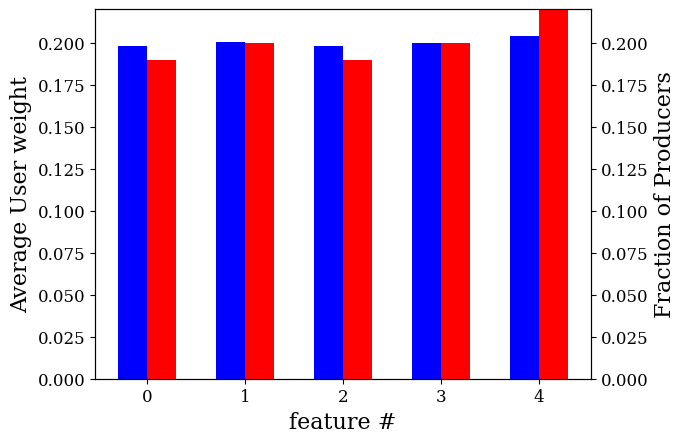

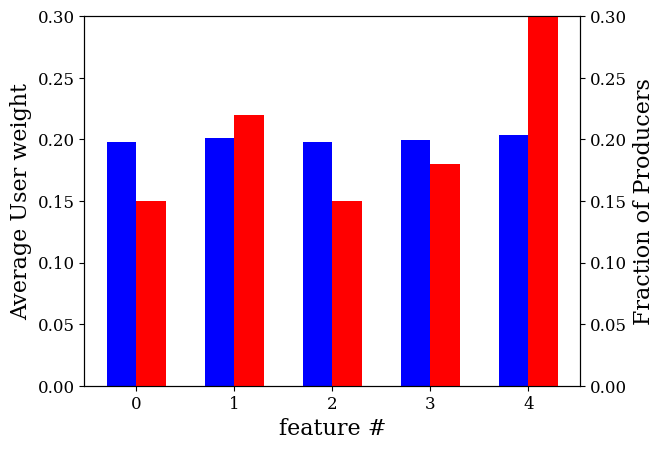

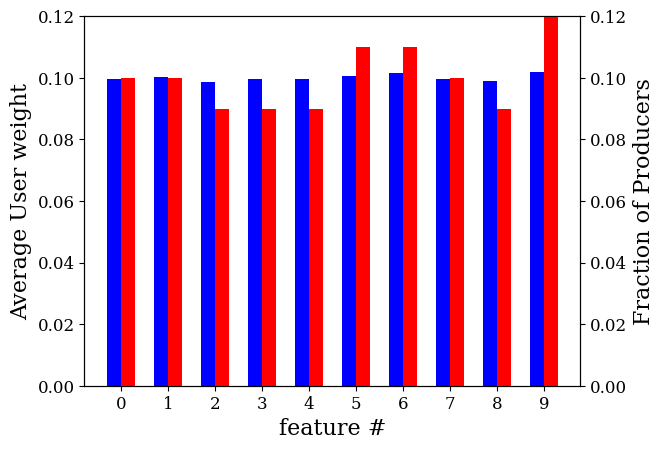

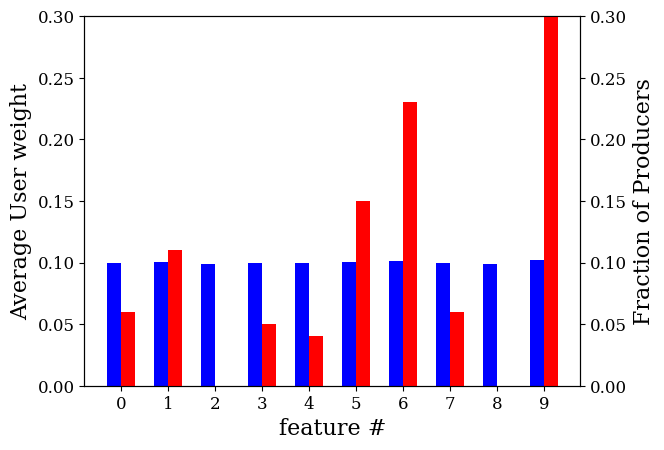

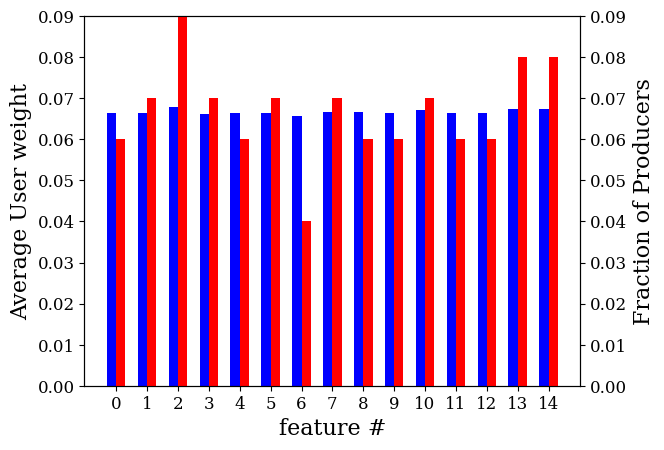

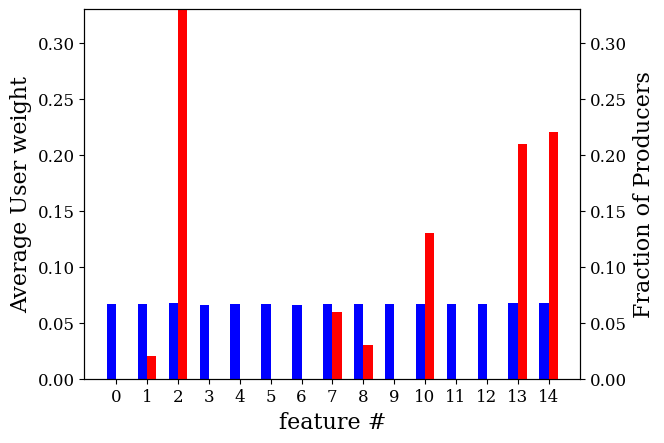

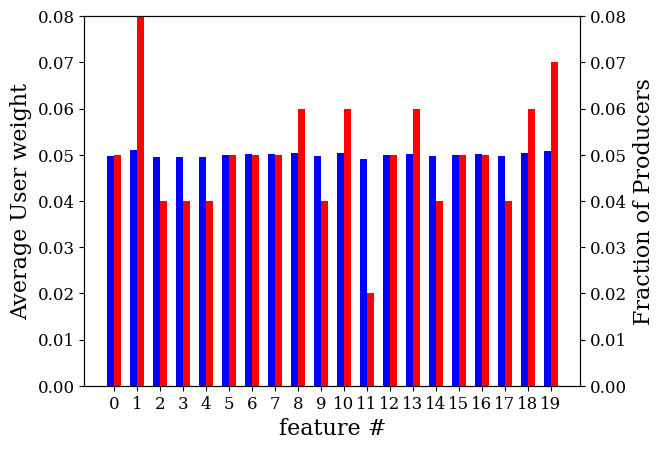

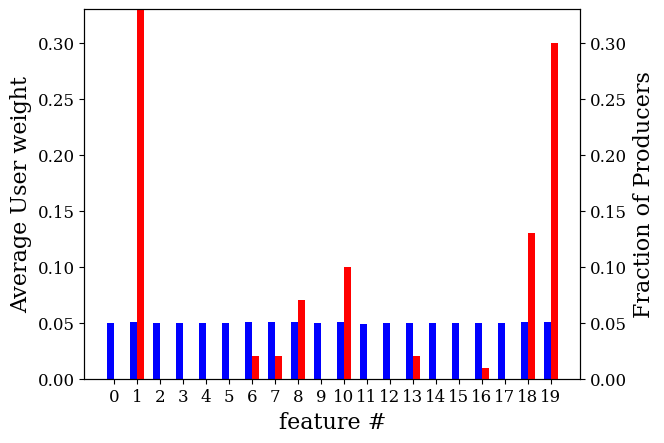

In [55]:
#uniform synthetic
df_linear = pd.read_pickle("../saved_frames/uniform_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/uniform_synthetic_grid_softmax_statistics.pkl") 
dims = [5, 10, 15, 20]
plot_and_save(dims, df_linear, df_softmax, 'uniformsynth')

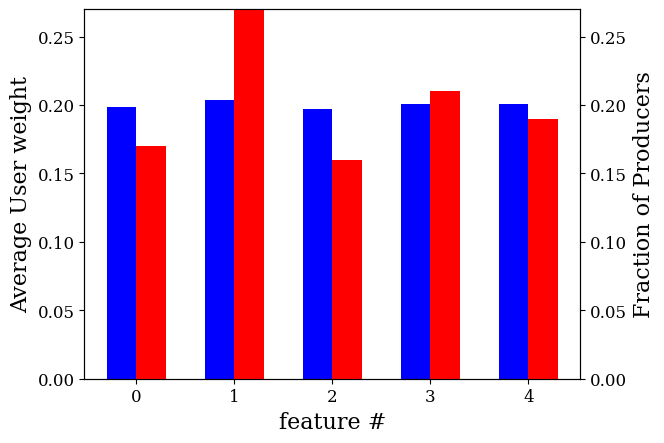

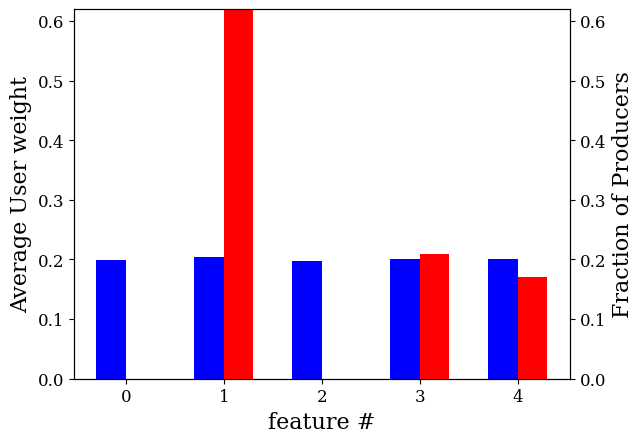

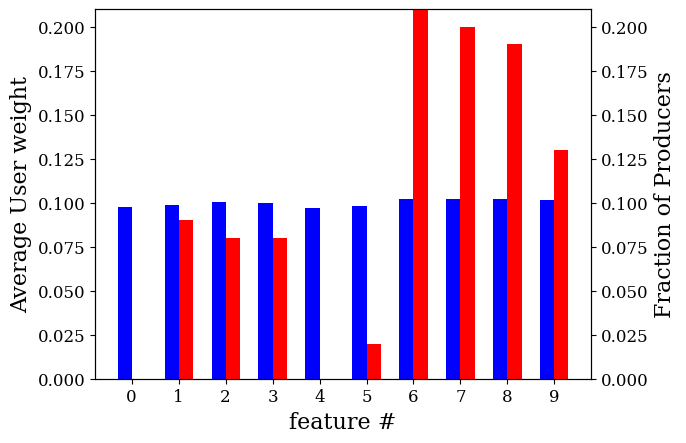

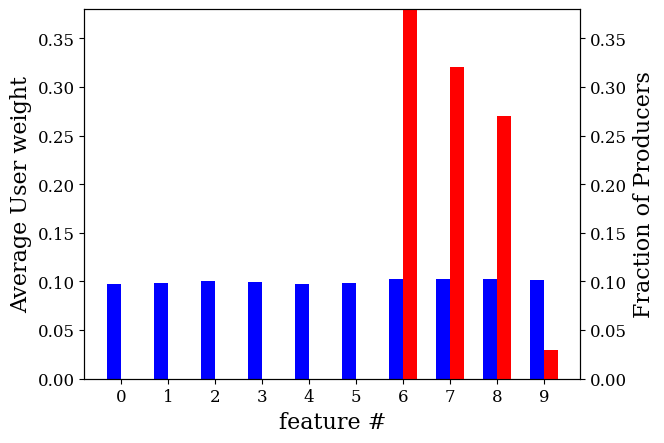

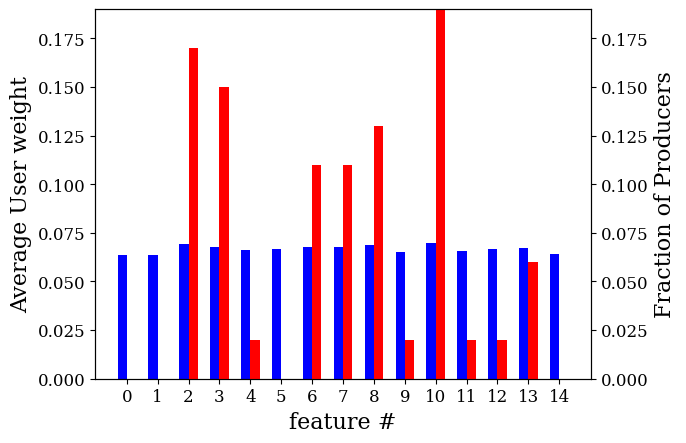

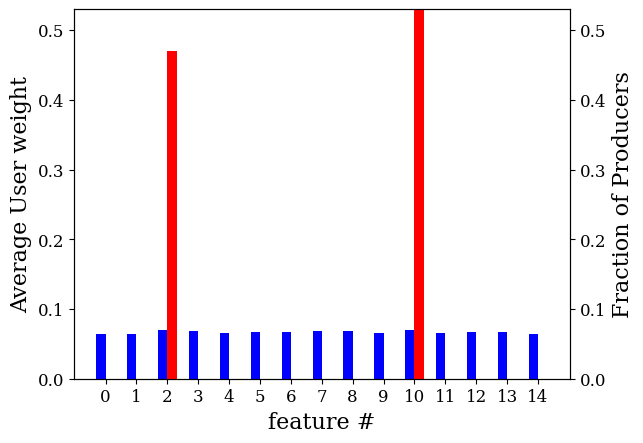

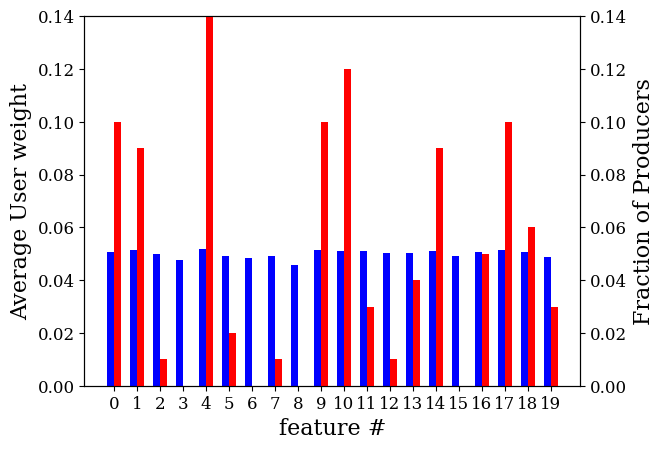

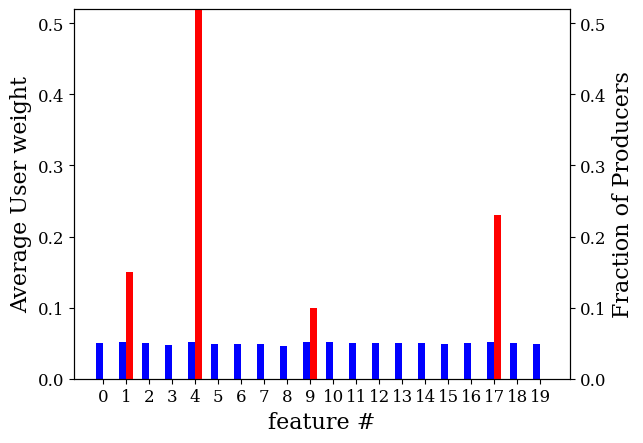

In [56]:
#Movielens
df_linear = pd.read_pickle("../saved_frames/Movielens100k_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/Movielens100k_grid_softmax_statistics.pkl") 
dims = [5, 10, 15, 20]
plot_and_save(dims, df_linear, df_softmax, 'Movielens')

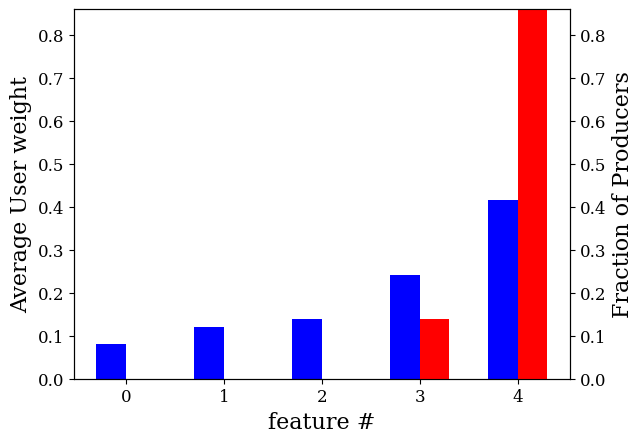

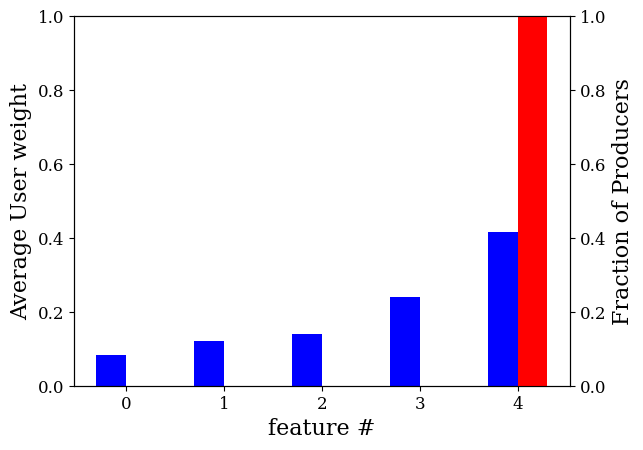

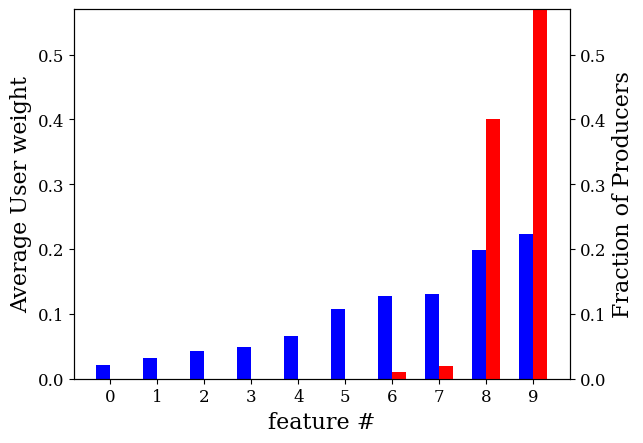

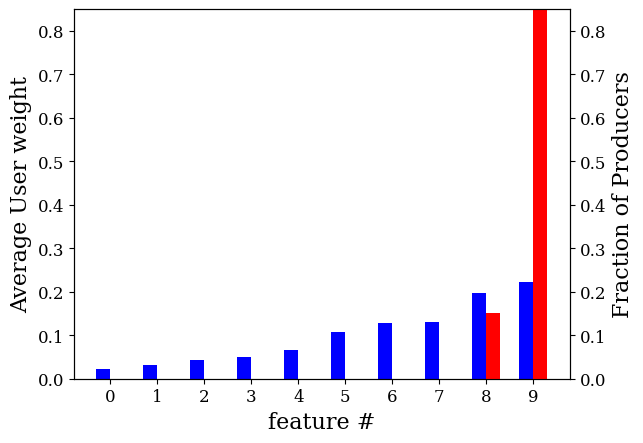

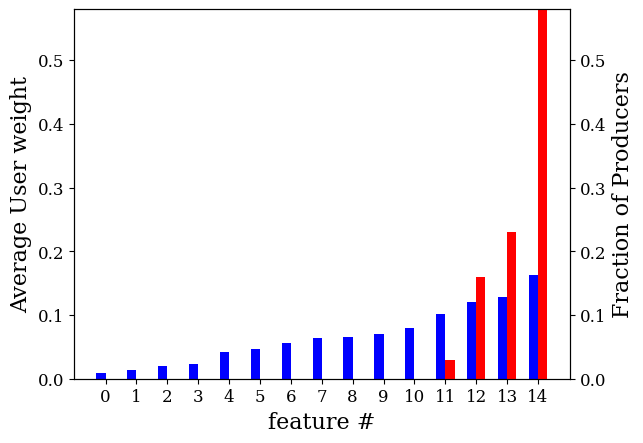

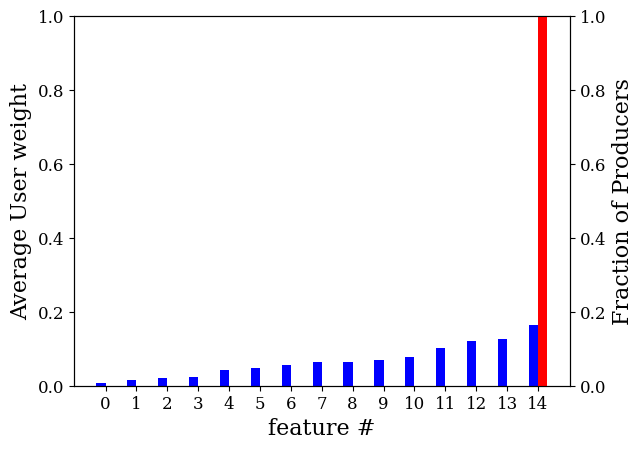

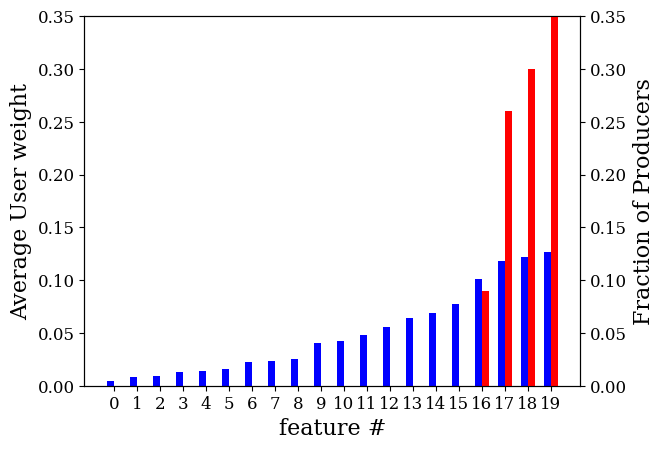

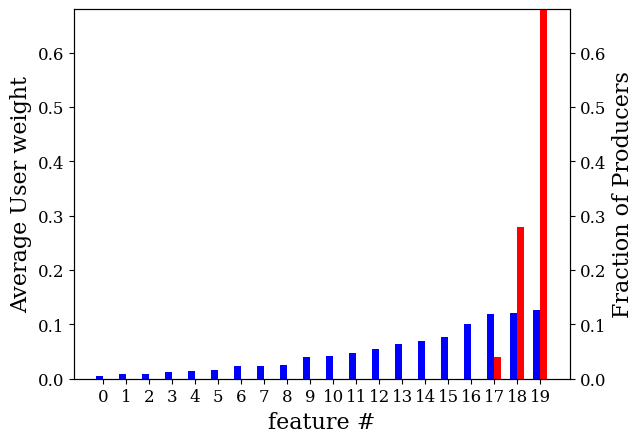

In [57]:
#Weighted Synthetic
df_linear = pd.read_pickle("../saved_frames/weighted_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/weighted_synthetic_grid_softmax_statistics.pkl")
dims = [5, 10, 15, 20]
plot_and_save(dims, df_linear, df_softmax, 'WeightedSynth')

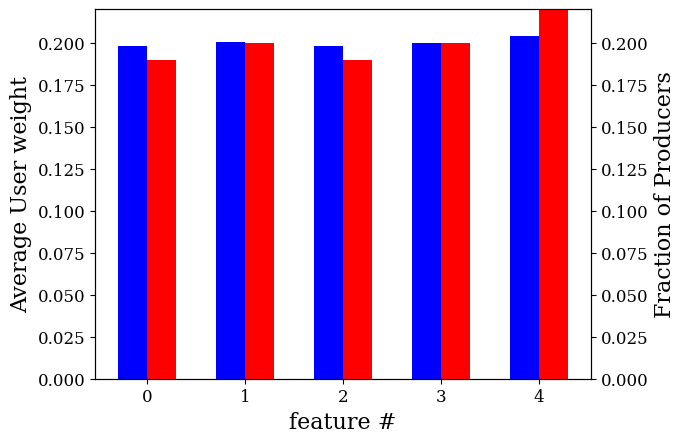

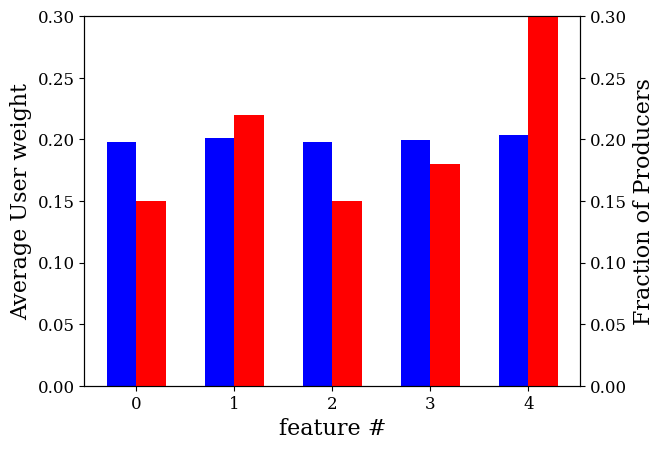

In [17]:
d = 5
nprod = 100
seed = 17

df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()

user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/uniformsynth_linear_dim5_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/uniformsynth_softmax_dim5_100prod.pdf')

# user_producer_2bar_plot_display(pd_linear, ud_linear)
# user_producer_2bar_plot_display(pd_softmax, ud_softmax)

### Uniform distribution, dimension = 10, nprod = 100

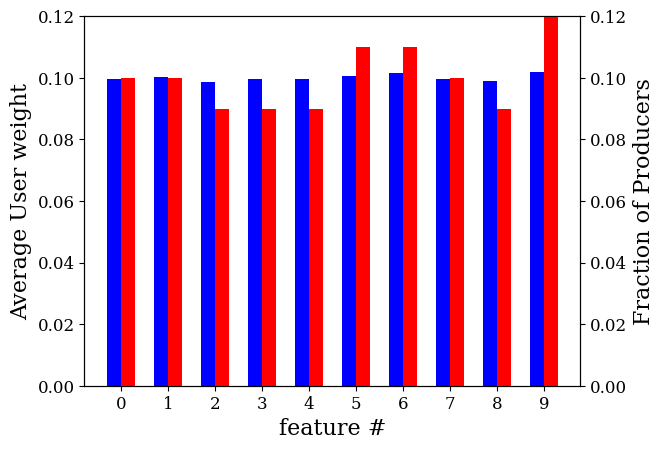

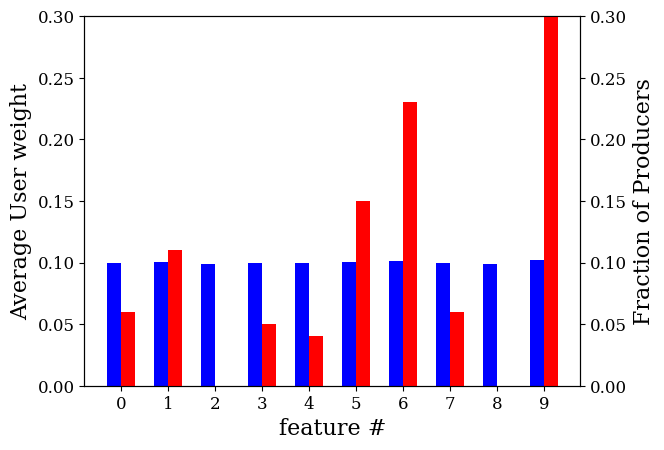

In [18]:
d = 10
nprod = 100
seed = 17

df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/uniformsynth_linear_dim10_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/uniformsynth_softmax_dim10_100prod.pdf')

### Uniform distribution, dimension = 15, nprod = 100

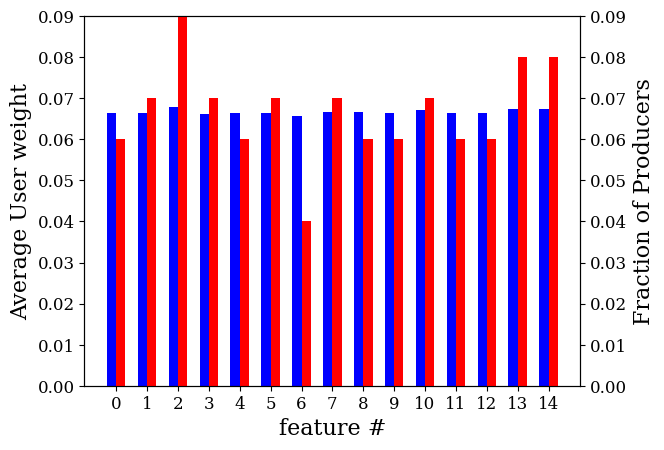

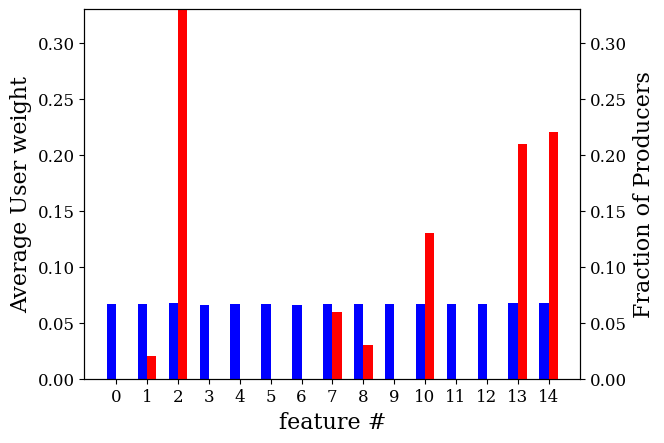

In [19]:
d = 15
nprod = 100
seed = 17

df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/uniformsynth_linear_dim15_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/uniformsynth_softmax_dim15_100prod.pdf')

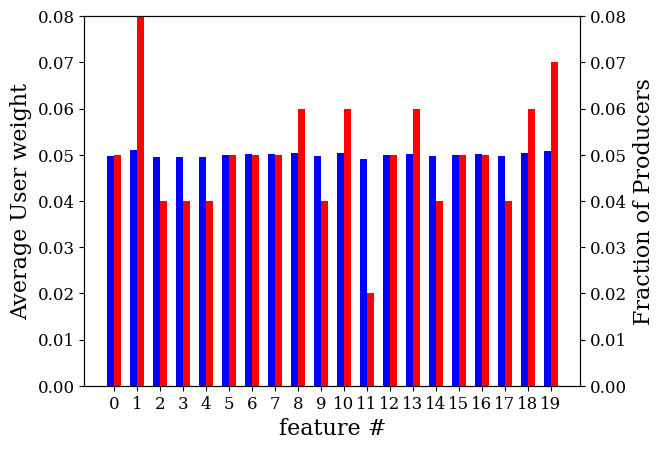

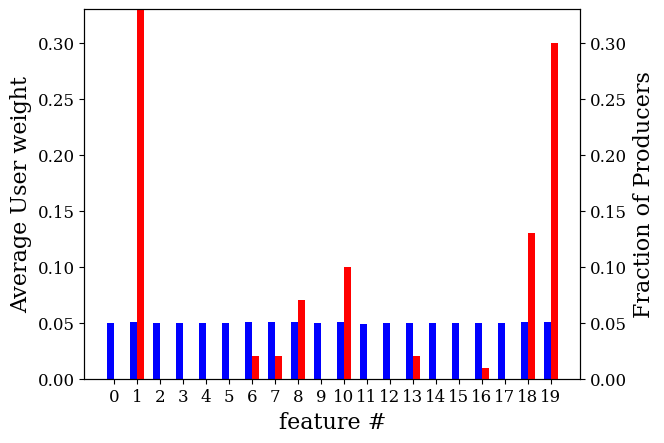

In [20]:
d = 20
nprod = 100
seed = 17

df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/uniformsynth_linear_dim20_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/uniformsynth_softmax_dim20_100prod.pdf')

## MOVIELENS data

In [26]:
df_linear = pd.read_pickle("../saved_frames/Movielens100k_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/Movielens100k_grid_softmax_statistics.pkl") 

In [27]:
df_linear.columns

Index(['dimension', 'seed', 'nprod', 'NE_exists', 'iters',
       'last_profile_compact', 'producer_dist', 'user_dist', 'total_prod_util',
       'avg_prod_util', 'max_prod_util', 'min_prod_util', 'total_user_util',
       'avg_user_util', 'max_user_util', 'min_user_util'],
      dtype='object')

In [28]:
df_linear[df_linear['NE_exists'] == False]

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
140,10,11,10,False,9999,"[1.0, 1.0, 3.0, 1.0, 0.0, 0.0, 2.0, 0.0, 1.0, ...","[0.1, 0.1, 0.3, 0.1, 0.0, 0.0, 0.2, 0.0, 0.1, ...","[0.10075397500621953, 0.1004768313800366, 0.10...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
307,20,2,80,False,9999,"[0.0, 2.0, 4.0, 7.0, 10.0, 6.0, 0.0, 0.0, 1.0,...","[0.0, 0.025, 0.05, 0.0875, 0.125, 0.075, 0.0, ...","[0.04892099746639292, 0.049776781602278594, 0....",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [29]:
df_softmax[df_softmax['NE_exists'] == False] # all converge to NE for softmax

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util


In [30]:
(df_linear[df_linear['NE_exists'] == True][utils_columns] - \
 df_softmax[df_linear['NE_exists'] == True][utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,398.000000,398.000000,398.000000,398.000000
mean,0.567853,0.535315,0.020759,0.072535
std,0.511870,0.456124,0.002496,0.036095
min,0.157766,0.155146,0.016228,0.021625
25%,0.243212,0.240820,0.018567,0.044404
50%,0.359313,0.349390,0.020825,0.059185
75%,0.649480,0.623769,0.022796,0.091930
max,2.330834,2.197152,0.025245,0.166107


In [31]:
df_merged = df_linear.merge(df_softmax, on = ['dimension', 'seed', 'nprod'], suffixes=['_lin', '_sm'])
df_merged = df_merged[df_merged['NE_exists_lin'] == True]
print(df_merged.shape)
key_pd = ['dimension', 'nprod']
utils = ['avg_prod_util_lin', 'avg_prod_util_sm', 'min_prod_util_lin', 'min_prod_util_sm', \
        'avg_user_util_lin', 'avg_user_util_sm', 'min_user_util_lin', 'min_user_util_sm']
df_merged[key_pd + utils].groupby(key_pd).mean()
df_uniform_averaging_seed = df_merged[key_pd + utils].groupby(key_pd).mean().reset_index()
df_uniform_averaging_seed.to_csv('movielens-utils.csv',encoding='utf-8', index=False)

(398, 29)


In [32]:
print(df_linear.shape, df_softmax.shape)
print((df_linear[['dimension', 'seed', 'nprod']] == df_softmax[['dimension', 'seed', 'nprod']]).sum(axis=0))
np.all(df_linear[['dimension', 'seed', 'nprod']] == df_softmax[['dimension', 'seed', 'nprod']])

(400, 16) (400, 16)
dimension    400
seed         400
nprod        400
dtype: int64


True

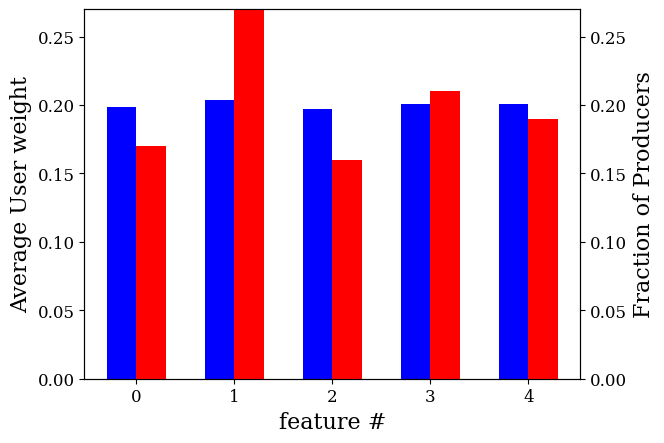

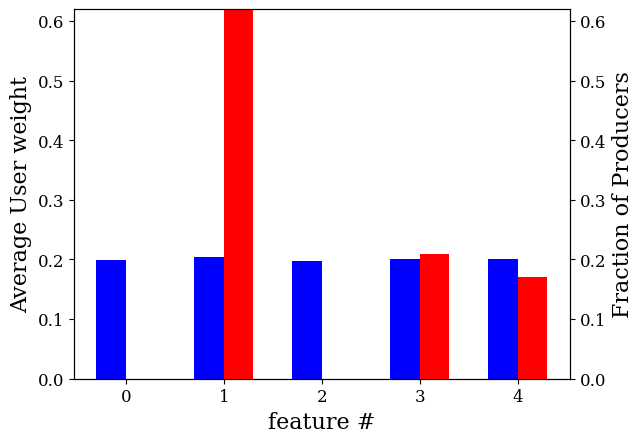

In [34]:
d = 5
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/Movielens_linear_dim5_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/Movielens_softmax_dim5_100prod.pdf')

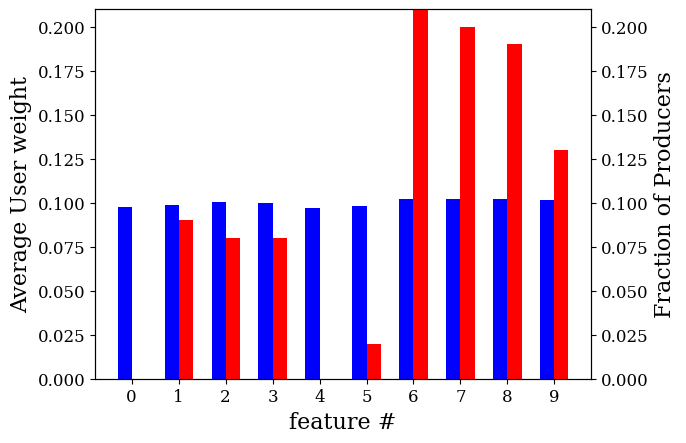

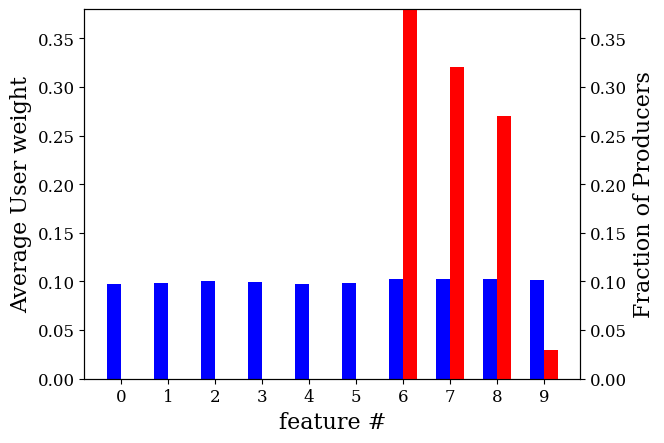

In [35]:
d = 10
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/Movielens_linear_dim10_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/Movielens_softmax_dim10_100prod.pdf')

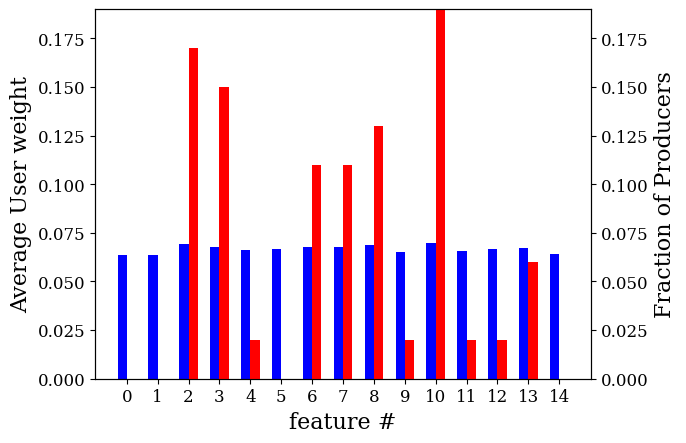

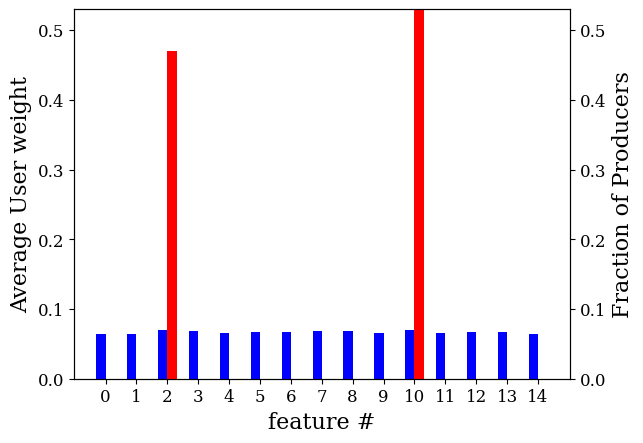

In [36]:
d = 15
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/Movielens_linear_dim15_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/Movielens_softmax_dim15_100prod.pdf')

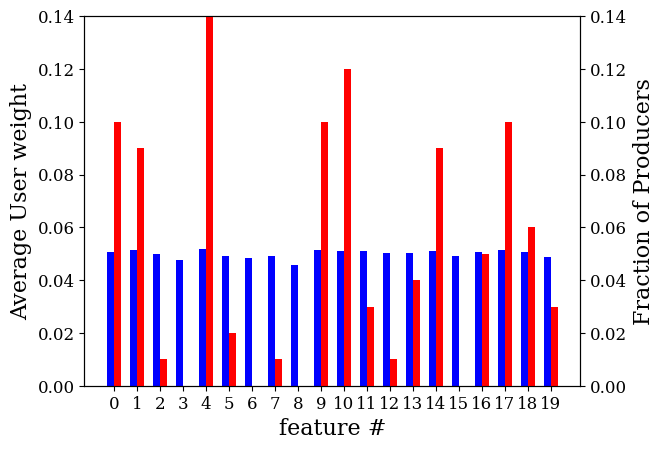

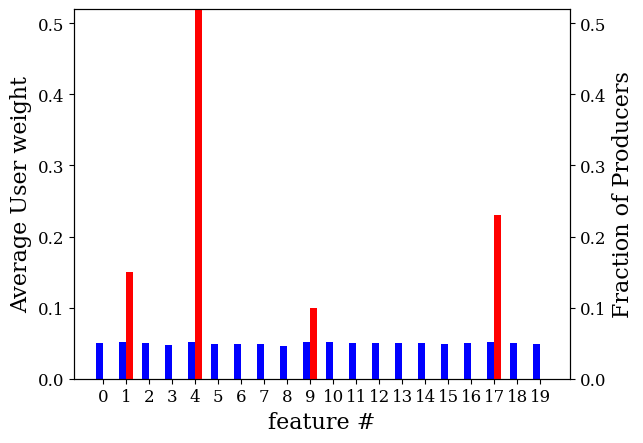

In [37]:
d = 20
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/Movielens_linear_dim20_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/Movielens_softmax_dim20_100prod.pdf')

## SORTED synthetic data

In [110]:
df_linear = pd.read_pickle("../saved_frames/sorted_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/sorted_synthetic_grid_softmax_statistics.pkl")

In [111]:
print(df_linear.shape, df_softmax.shape)
print((df_linear[['dimension', 'seed', 'nprod']] == df_softmax[['dimension', 'seed', 'nprod']]).sum(axis=0))
np.all(df_linear[['dimension', 'seed', 'nprod']] == df_softmax[['dimension', 'seed', 'nprod']])

(400, 16) (400, 16)
dimension    400
seed         400
nprod        400
dtype: int64


True

In [35]:
df_linear[df_linear['NE_exists'] == False] # 1 doesnt converge to NE for linear

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util


In [36]:
df_softmax[df_softmax['NE_exists'] == False] # 1 doesnt converge to NE for linear

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util


In [37]:
df_softmax[(df_softmax['seed'] ==  17) & (df_softmax['dimension'] ==  15)\
                           & (df_softmax['nprod'] == 100)]['last_profile_compact'].values

array([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                0.,   0.,   0., 100.])                                         ],
      dtype=object)

In [38]:
df_linear[(df_linear['seed'] ==  17) & (df_linear['dimension'] ==  15)\
                           & (df_linear['nprod'] == 100)]['last_profile_compact'].values

array([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                0.,   0.,   0., 100.])                                         ],
      dtype=object)

In [55]:
print(np.array(df_linear[df_linear['dimension'] == 15]['last_profile_compact'].to_numpy()))
print(np.array(df_linear[df_linear['dimension'] == 15]['last_profile_compact'].to_numpy()).sum(axis=0))

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 10.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 20.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 30.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 40.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 50.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 60.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 70.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 80.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 90.])
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 100.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

In [56]:
print(np.array(df_softmax[df_softmax['dimension'] == 15]['last_profile_compact'].to_numpy()))
print(np.array(df_softmax[df_softmax['dimension'] == 15]['last_profile_compact'].to_numpy()).sum(axis=0))

[array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 10.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 20.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 30.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 40.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 50.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 60.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 70.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 80.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0., 90.])
 array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0., 100.])
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0

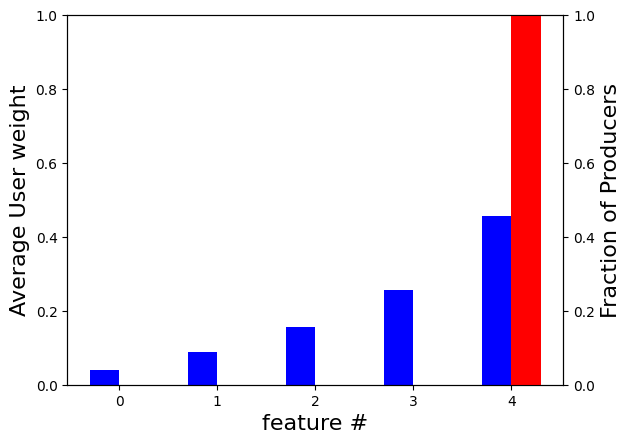

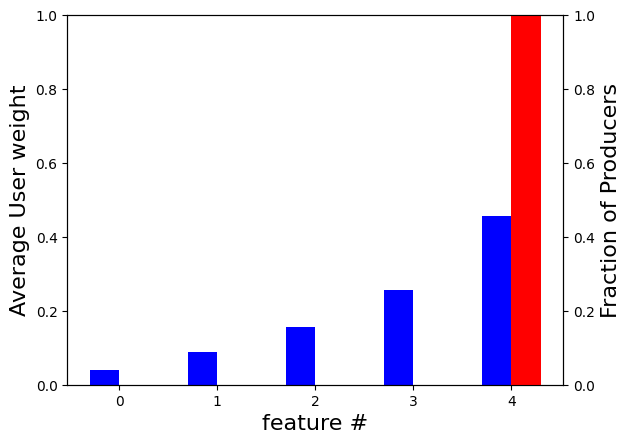

In [33]:
d = 5
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/SortedSynth_linear_dim5_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/SortedSynth_softmax_dim5_100prod.pdf')

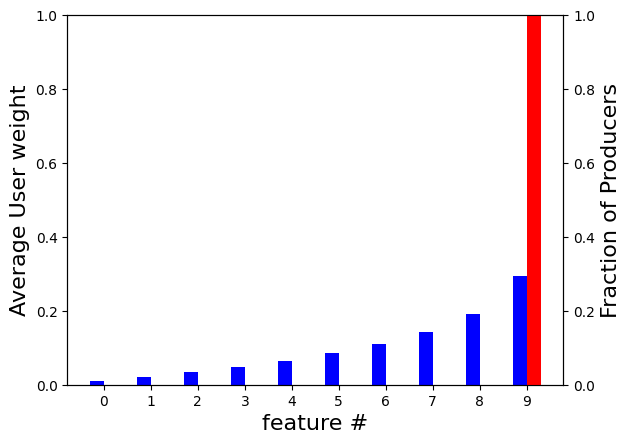

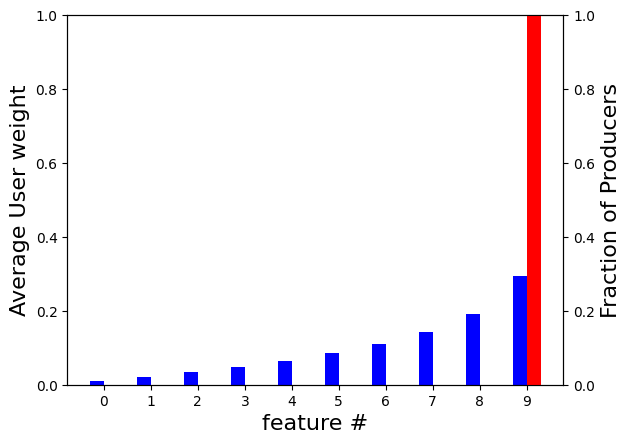

In [34]:
d = 10
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/SortedSynth_linear_dim10_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/SortedSynth_softmax_dim10_100prod.pdf')

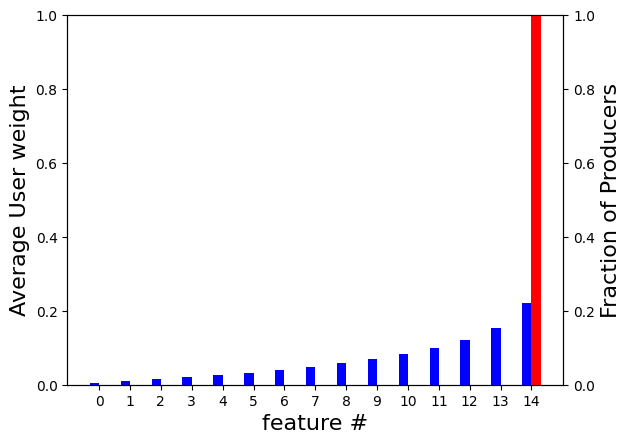

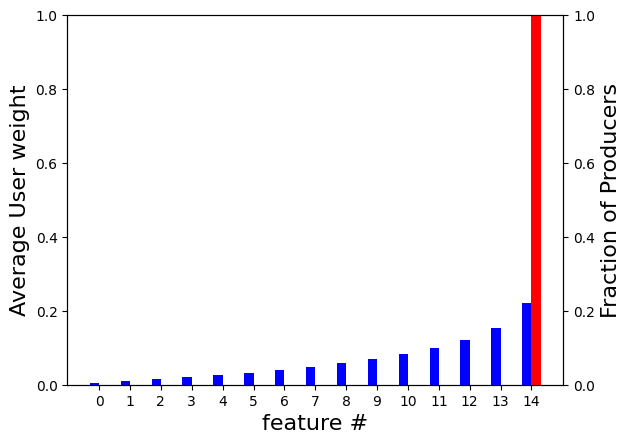

In [35]:
d = 15
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/SortedSynth_linear_dim15_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/SortedSynth_softmax_dim15_100prod.pdf')

In [54]:
(df_linear[df_linear['NE_exists']==True][utils_columns] >= df_softmax[df_linear['NE_exists']==True][utils_columns]).describe()

,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
count,399,399,399,399,399,399,399,399
unique,1,1,1,1,1,1,2,1
top,True,True,True,True,True,True,True,True
freq,399,399,399,399,399,399,397,399


In [56]:
df_linear[df_linear['NE_exists']==False]

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
270,15,19,10,False,9999,"[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[0.0, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, ...","[0.06638044181189726, 0.0664076402597995, 0.06...",-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [57]:
df_softmax[df_linear['NE_exists']==False]

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
270,15,19,10,True,10,"[0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 2.0, 0.0, 0.0, ...","[0.0, 0.0, 0.2, 0.2, 0.0, 0.0, 0.2, 0.0, 0.0, ...","[0.06638044181189726, 0.0664076402597995, 0.06...",708.426095,70.84261,71.172027,70.652381,708.426095,0.070843,0.196254,0.008524


## WEIGHTED synthetic

In [40]:
df_linear = pd.read_pickle("../saved_frames/weighted_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/weighted_synthetic_grid_softmax_statistics.pkl")

In [39]:
(df_linear[df_linear['NE_exists'] == True][utils_columns] - \
 df_softmax[df_linear['NE_exists'] == True][utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,400.000000,4.000000e+02,4.000000e+02,400.000000
mean,15.091527,1.395623e+01,5.214667e-02,0.010794
std,15.768118,1.372565e+01,2.156914e-02,0.011133
min,0.000000,-7.105427e-15,-5.551115e-17,-0.000019
25%,5.965693,5.766701e+00,3.935630e-02,0.003955
50%,9.433524,9.228340e+00,5.002975e-02,0.008811
75%,17.082536,1.644611e+01,6.314280e-02,0.014420
max,95.117308,8.414068e+01,9.518189e-02,0.072476


In [ ]:
(df_linear[df_linear['NE_exists'] == True][utils_columns] - \
 df_softmax[df_linear['NE_exists'] == True][utils_columns]).describe()

In [53]:
df_merged = df_linear.merge(df_softmax, on = ['dimension', 'seed', 'nprod'], suffixes=['_lin', '_sm'])
df_merged = df_merged[df_merged['NE_exists_lin'] == True]
print(df_merged.shape)
key_pd = ['dimension', 'nprod']
utils = ['avg_prod_util_lin', 'avg_prod_util_sm', 'min_prod_util_lin', 'min_prod_util_sm', \
        'avg_user_util_lin', 'avg_user_util_sm', 'min_user_util_lin', 'min_user_util_sm']
df_merged[key_pd + utils].groupby(key_pd).mean()
df_uniform_averaging_seed = df_merged[key_pd + utils].groupby(key_pd).mean().reset_index()
df_uniform_averaging_seed.to_csv('skewed_dataset_utils.csv',encoding='utf-8', index=False)

(400, 29)


In [50]:
df_linear[df_linear['NE_exists']==False]

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util


In [51]:
df_softmax[df_linear['NE_exists']==False]

,dimension,seed,nprod,NE_exists,iters,last_profile_compact,producer_dist,user_dist,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util


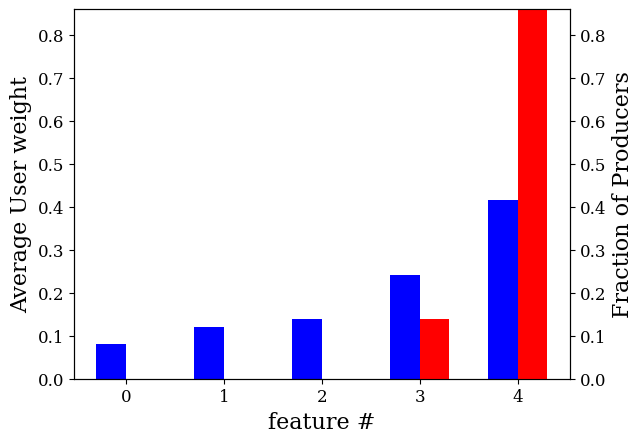

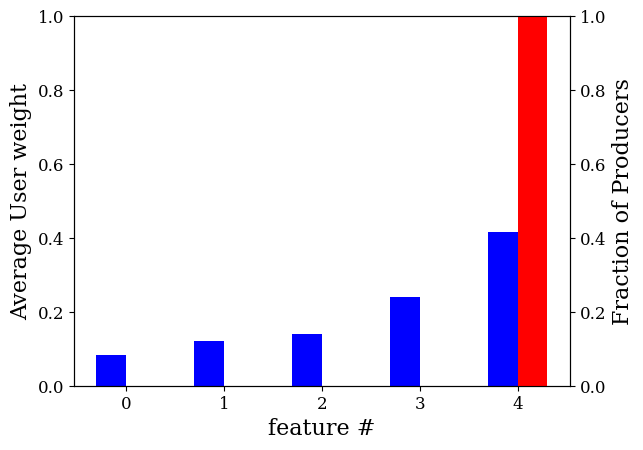

In [41]:
d = 5
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/WeightedSynth_linear_dim5_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/WeightedSynth_softmax_dim5_100prod.pdf')

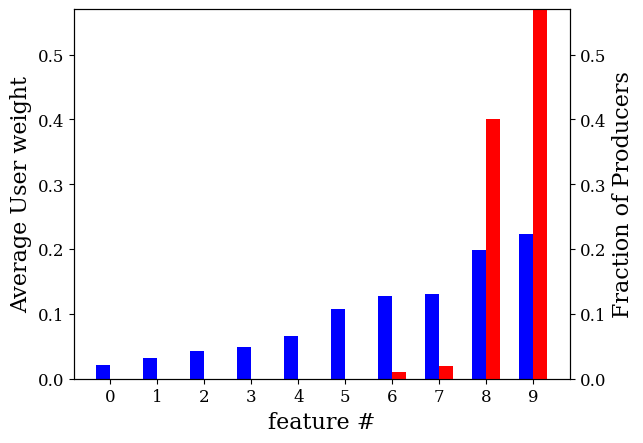

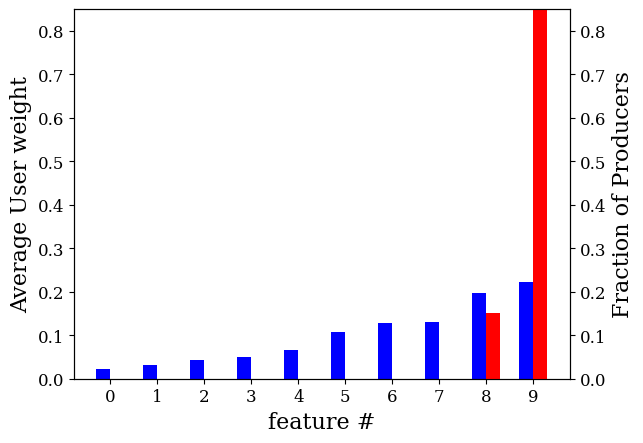

In [42]:
d = 10
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/WeightedSynth_linear_dim10_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/WeightedSynth_softmax_dim10_100prod.pdf')

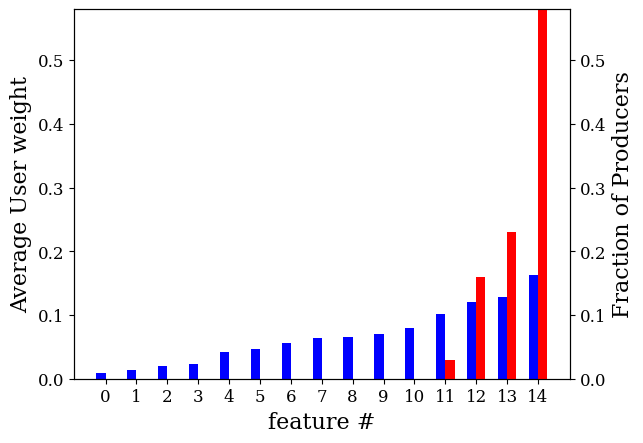

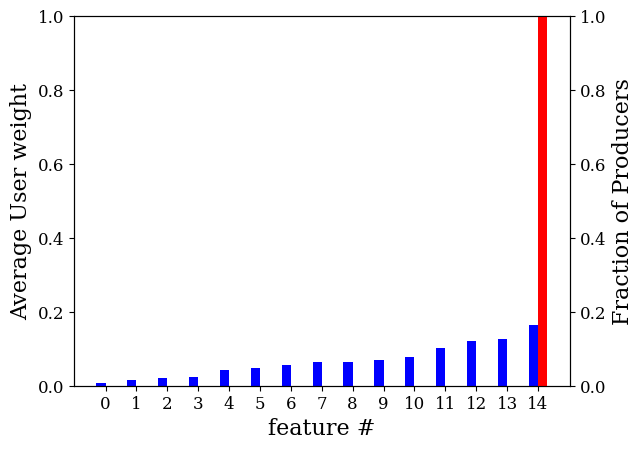

In [43]:
d = 15
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/WeightedSynth_linear_dim15_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/WeightedSynth_softmax_dim15_100prod.pdf')

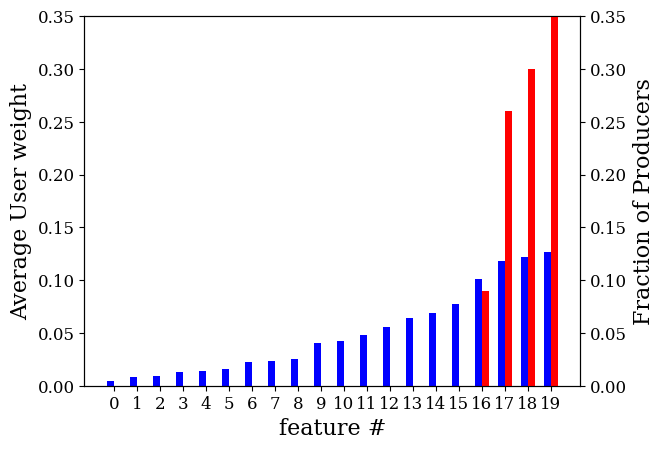

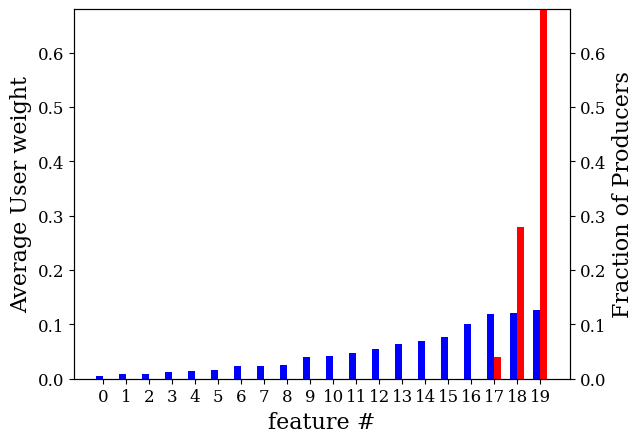

In [44]:
d = 20
nprod = 100
seed = 17
df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]
ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()
user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/WeightedSynth_linear_dim20_100prod.pdf')
user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/WeightedSynth_softmax_dim20_100prod.pdf')

In [14]:
df_linear_utils  = df_linear[df_linear['NE_exists']][utils_columns]
df_softmax_utils = df_softmax[df_linear['NE_exists']][utils_columns]

In [15]:
(df_linear_utils-df_softmax_utils).describe() # check via tolerance

,total_prod_util,avg_prod_util,max_prod_util,min_prod_util,total_user_util,avg_user_util,max_user_util,min_user_util
count,400.000000,400.000000,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,521.466679,15.091527,1.806352e+01,1.395623e+01,5.214667e+02,5.214667e-02,0.072271,0.010794
std,215.691443,15.768118,2.108300e+01,1.372565e+01,2.156914e+02,2.156914e-02,0.093241,0.011133
min,0.000000,0.000000,-7.105427e-15,-7.105427e-15,-4.547474e-13,-5.551115e-17,-0.046482,-0.000019
25%,393.563039,5.965693,6.563180e+00,5.766701e+00,3.935630e+02,3.935630e-02,-0.002891,0.003955
50%,500.297495,9.433524,1.075231e+01,9.228340e+00,5.002975e+02,5.002975e-02,0.032698,0.008811
75%,631.427964,17.082536,1.942238e+01,1.644611e+01,6.314280e+02,6.314280e-02,0.141762,0.014420
max,951.818852,95.117308,1.390043e+02,8.414068e+01,9.518189e+02,9.518189e-02,0.297172,0.072476


In [17]:
(df_linear_utils >= df_softmax_utils).sum(axis=0)

total_prod_util    400
avg_prod_util      400
max_prod_util      399
min_prod_util      399
total_user_util    399
avg_user_util      399
max_user_util      229
min_user_util      395
dtype: int64

In [10]:
(df_linear_utils-df_softmax_utils)

NameError: name 'df_linear_utils' is not defined

In [32]:
df_softmax[(df_softmax['seed'] ==  17) & (df_softmax['dimension'] ==  15)\
                           & (df_softmax['nprod'] == 100)]['last_profile_compact'].values

array([array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
                0.,   0.,   0., 100.])                                         ],
      dtype=object)

In [33]:
df_linear[(df_linear['seed'] ==  17) & (df_linear['dimension'] ==  15)\
                           & (df_linear['nprod'] == 100)]['last_profile_compact'].values

array([array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3., 16.,
              23., 58.])                                                      ],
      dtype=object)

In [27]:
df_linear[df_linear['dimension'] == 5]['last_profile_compact'].to_numpy()

array([array([0., 0., 0., 4., 6.]), array([ 0.,  0.,  0.,  9., 11.]),
       array([ 0.,  0.,  0., 13., 17.]), array([ 0.,  0.,  0., 18., 22.]),
       array([ 0.,  0.,  0., 22., 28.]), array([ 0.,  0.,  0., 27., 33.]),
       array([ 0.,  0.,  0., 31., 39.]), array([ 0.,  0.,  0., 36., 44.]),
       array([ 0.,  0.,  0., 40., 50.]), array([ 0.,  0.,  0., 45., 55.]),
       array([0., 0., 1., 5., 4.]), array([0., 0., 3., 9., 8.]),
       array([ 0.,  0.,  5., 13., 12.]), array([ 0.,  0.,  6., 17., 17.]),
       array([ 0.,  0.,  8., 21., 21.]), array([ 0.,  0.,  9., 26., 25.]),
       array([ 0.,  0., 11., 30., 29.]), array([ 0.,  0., 13., 34., 33.]),
       array([ 0.,  0., 14., 38., 38.]), array([ 0.,  0., 16., 42., 42.]),
       array([ 0.,  0.,  0.,  0., 10.]), array([ 0.,  0.,  0.,  1., 19.]),
       array([ 0.,  0.,  0.,  1., 29.]), array([ 0.,  0.,  0.,  2., 38.]),
       array([ 0.,  0.,  0.,  2., 48.]), array([ 0.,  0.,  0.,  3., 57.]),
       array([ 0.,  0.,  0.,  3., 67.]),

In [48]:
print(np.array(df_softmax[df_softmax['dimension'] == 5]['last_profile_compact'].to_numpy()))
print(np.array(df_softmax[df_softmax['dimension'] == 5]['last_profile_compact'].to_numpy()).sum(axis=0))

[array([0., 0., 0., 4., 6.]) array([ 0.,  0.,  0.,  7., 13.])
 array([ 0.,  0.,  0., 11., 19.]) array([ 0.,  0.,  0., 15., 25.])
 array([ 0.,  0.,  0., 19., 31.]) array([ 0.,  0.,  0., 22., 38.])
 array([ 0.,  0.,  0., 26., 44.]) array([ 0.,  0.,  0., 30., 50.])
 array([ 0.,  0.,  0., 34., 56.]) array([ 0.,  0.,  0., 38., 62.])
 array([0., 0., 0., 5., 5.]) array([ 0.,  0.,  0., 10., 10.])
 array([ 0.,  0.,  0., 16., 14.]) array([ 0.,  0.,  0., 21., 19.])
 array([ 0.,  0.,  0., 26., 24.]) array([ 0.,  0.,  0., 31., 29.])
 array([ 0.,  0.,  0., 36., 34.]) array([ 0.,  0.,  0., 41., 39.])
 array([ 0.,  0.,  0., 46., 44.]) array([ 0.,  0.,  0., 52., 48.])
 array([ 0.,  0.,  0.,  0., 10.]) array([ 0.,  0.,  0.,  0., 20.])
 array([ 0.,  0.,  0.,  0., 30.]) array([ 0.,  0.,  0.,  0., 40.])
 array([ 0.,  0.,  0.,  0., 50.]) array([ 0.,  0.,  0.,  0., 60.])
 array([ 0.,  0.,  0.,  0., 70.]) array([ 0.,  0.,  0.,  0., 80.])
 array([ 0.,  0.,  0.,  0., 90.]) array([  0.,   0.,   0.,   0., 100.])


In [ ]:
df_linear

## comapring linear, softmax and random recommendation uniform distribution dataset

In [55]:
df_linear = pd.read_pickle("../saved_frames/uniform_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/uniform_synthetic_grid_softmax_statistics.pkl") 
df_rand = pd.read_pickle("../saved_frames/uniform_synthetic_grid_randomserving_statistics.pkl") 

In [72]:
(df_rand['total_prod_util']- df_rand['total_user_util']).describe()

count    4.000000e+02
mean    -5.115908e-14
std      2.700120e-12
min     -4.774847e-12
25%     -1.605827e-12
50%     -2.273737e-13
75%      7.389644e-13
max      6.593837e-12
dtype: float64

In [74]:
(df_linear[df_linear['NE_exists']][utils_columns] - df_rand[df_linear['NE_exists']][utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,399.000000,399.000000,399.000000,399.000000
mean,22.665244,21.697461,0.078117,0.108113
std,24.211646,22.915706,0.033402,0.057520
min,4.354646,4.266342,0.040319,0.013639
25%,8.486943,8.256946,0.048928,0.060090
50%,14.445685,13.790557,0.078304,0.102126
75%,26.393477,25.442957,0.105411,0.154340
max,132.498630,129.378060,0.132513,0.201728


In [61]:
(df_softmax[utils_columns] - df_rand[utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,400.000000,400.000000,400.000000,400.000000
mean,2.823924,2.724161,0.009664,0.057997
std,4.646029,4.390272,0.009943,0.073887
min,0.131958,0.130326,0.001278,0.003288
25%,0.444356,0.434879,0.002617,0.007968
50%,1.054163,1.033412,0.004933,0.015460
75%,3.211044,3.111278,0.012135,0.083947
max,27.972720,26.483613,0.027984,0.200180


In [77]:
(df_rand['user_dist'] - df_linear['user_dist']).values

array([array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0.,

In [67]:
df_rand['user_dist'] - df_softmax['user_dist']

0                              [0.0, 0.0, 0.0, 0.0, 0.0]
1                              [0.0, 0.0, 0.0, 0.0, 0.0]
2                              [0.0, 0.0, 0.0, 0.0, 0.0]
3                              [0.0, 0.0, 0.0, 0.0, 0.0]
4                              [0.0, 0.0, 0.0, 0.0, 0.0]
                             ...                        
395    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
396    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
397    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
398    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
399    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
Name: user_dist, Length: 400, dtype: object

## comparing linear, softmax and random rec on skewed

In [84]:
df_linear = pd.read_pickle("../saved_frames/weighted_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/weighted_synthetic_grid_softmax_statistics.pkl") 
df_rand = pd.read_pickle("../saved_frames/weighted_synthetic_grid_randomserving_statistics.pkl") 

In [88]:
df_rand['producer_dist'].values

array([array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0.]),
       array([0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0.]),
       array([0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0.]),
       array([0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0.]),
       array([0., 0., 0., 1., 0.]), array([0., 0., 0., 1., 0.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0., 0., 1.]), array([0., 0., 0., 0., 1.]),
       array([0., 0., 0.,

In [89]:
df_rand.loc[10]

dimension                                                               5
seed                                                                    3
nprod                                                                  10
NE_exists                                                            True
iters                                                                   1
last_profile_compact                           [0.0, 0.0, 0.0, 10.0, 0.0]
producer_dist                                   [0.0, 0.0, 0.0, 1.0, 0.0]
user_dist               [0.04882888480109512, 0.16957618633955748, 0.2...
total_prod_util                                               2796.023885
avg_prod_util                                                  279.602388
max_prod_util                                                  279.602388
min_prod_util                                                  279.602388
total_user_util                                               2796.023885
avg_user_util                         

In [90]:
df_rand.loc[10]['user_dist']

array([0.04882888, 0.16957619, 0.22447454, 0.27960239, 0.277518  ])

In [80]:
(df_softmax[utils_columns] - df_rand[utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,1.798543e+00,1.696868e+00,6.152809e-03,2.273451e-03
std,4.138925e+00,3.834874e+00,9.670466e-03,4.919416e-03
min,-1.932676e-12,-2.046363e-12,-1.110223e-16,-1.626303e-19
25%,4.973799e-14,4.796163e-14,0.000000e+00,0.000000e+00
50%,3.725257e-01,3.413109e-01,2.213748e-03,1.310378e-04
75%,1.721120e+00,1.653808e+00,6.536508e-03,1.767226e-03
max,4.327431e+01,3.850656e+01,4.327431e-02,2.687805e-02


In [81]:
(df_linear[utils_columns] - df_rand[utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,4.000000e+02,4.000000e+02,4.000000e+02,4.000000e+02
mean,1.689007e+01,1.565309e+01,5.829948e-02,1.306711e-02
std,1.883354e+01,1.650831e+01,2.925562e-02,1.283602e-02
min,-1.932676e-12,-2.046363e-12,-5.551115e-17,-1.355253e-20
25%,6.173796e+00,6.035657e+00,3.935630e-02,4.549325e-03
50%,1.037289e+01,9.989958e+00,5.243858e-02,1.045493e-02
75%,1.958445e+01,1.852556e+01,7.288181e-02,1.738729e-02
max,1.261130e+02,1.119369e+02,1.266944e-01,7.953531e-02


In [82]:
df_rand[utils_columns]

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
0,422.529561,422.529561,0.422530,0.000069
1,211.264781,211.264781,0.422530,0.000069
2,140.843187,140.843187,0.422530,0.000069
3,105.632390,105.632390,0.422530,0.000069
4,84.505912,84.505912,0.422530,0.000069
...,...,...,...,...
395,26.031301,26.031301,0.156188,0.000060
396,22.312544,22.312544,0.156188,0.000060
397,19.523476,19.523476,0.156188,0.000060
398,17.354201,17.354201,0.156188,0.000060


## comparing linear, softmax and random rec on movielens

In [102]:
df_linear = pd.read_pickle("../saved_frames/Movielens100k_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/Movielens100k_grid_softmax_statistics.pkl") 
df_rand = pd.read_pickle("../saved_frames/movielens_synthetic_grid_randomserving_statistics.pkl") 

In [95]:
(df_linear['user_dist'] - df_rand['user_dist']).values

array([array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0.]),
       array([0., 0., 0.,

In [93]:
df_linear[df_linear['NE_exists']][utils_columns]

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
0,21.876149,21.578272,0.231985,0.129731
1,10.955561,10.893951,0.232355,0.135115
2,7.294644,7.278639,0.232067,0.133271
3,5.479142,5.466450,0.232413,0.161502
4,4.383945,4.372016,0.232447,0.158234
...,...,...,...,...
395,1.104065,1.097684,0.070248,0.034341
396,0.946359,0.942138,0.070249,0.033350
397,0.827913,0.823844,0.070236,0.033102
398,0.736354,0.732955,0.070278,0.034881


In [99]:
np.all(df_linear[['dimension', 'seed', 'nprod']]  == df_rand[['dimension', 'seed', 'nprod']])

True

In [101]:
(df_linear[df_linear['NE_exists']][utils_columns] - df_rand[df_linear['NE_exists']][utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,398.000000,398.000000,398.000000,398.000000
mean,0.606546,0.572301,0.022169,0.087728
std,0.554806,0.495495,0.003622,0.050507
min,0.158663,0.156038,0.016343,0.024842
25%,0.265560,0.261317,0.019494,0.046004
50%,0.379114,0.372848,0.021595,0.064015
75%,0.675875,0.649824,0.025451,0.097897
max,2.632328,2.448344,0.028158,0.198364


In [104]:
(df_softmax[utils_columns] - df_rand[utils_columns]).describe()

,avg_prod_util,min_prod_util,avg_user_util,min_user_util
count,4.000000e+02,4.000000e+02,400.000000,4.000000e+02
mean,3.872893e-02,3.701822e-02,0.001405,1.512587e-02
std,6.211657e-02,5.779791e-02,0.001394,2.073184e-02
min,-1.065814e-14,-1.065814e-14,0.000000,-2.710505e-20
25%,5.974238e-03,5.721023e-03,0.000346,2.199907e-03
50%,1.669379e-02,1.645092e-02,0.000841,5.701821e-03
75%,4.526633e-02,4.457958e-02,0.001985,2.082120e-02
max,4.066530e-01,3.671685e-01,0.004312,9.706645e-02


## Checking variation along dimensions

In [74]:
def user_producer_2bar_ploterr(pd, ud, err): #producer distribution and user distribution
    #TODO add savefig too
    dim = len(pd)
    y_max = max(max(ud), max(pd))

    x1, y1 = np.arange(dim), ud
    x2, y2 = np.arange(dim), pd

    fig, ax = plt.subplots()
    ax.bar(np.array(x1)-0.15, y1, width = 0.3, color='blue')
    ax.set_ylabel('Average User weight', fontsize=16)
    ax.set_xlabel('feature #', fontsize=16)
    plt.ylim(0, y_max)
    plt.errorbar(x1-0.15, y1, yerr = err, fmt='.', color='Black', elinewidth=2,capthick=10,errorevery=1, alpha=0.5, ms=4, capsize = 2)

    ax2 = ax.twinx()
    ax2.bar(np.array(x2)+0.15, y2, width = 0.3, color='red')
    ax2.set_ylabel('Fraction of Producers', fontsize=16)
    plt.ylim(0, y_max)

    plt.xticks(range(dim))
    plt.show()


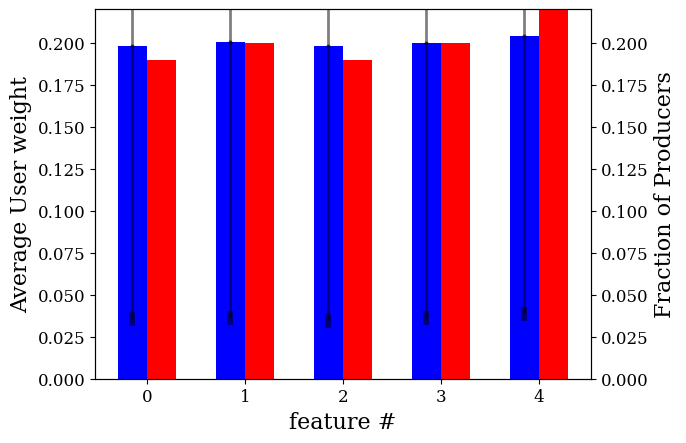

In [75]:
#uniform synthetic
df_linear = pd.read_pickle("../saved_frames/uniform_synthetic_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/uniform_synthetic_grid_softmax_statistics.pkl") 
# dims = [5, 10, 15, 20]
# plot_and_save(dims, df_linear, df_softmax, 'uniformsynth')
d = 5
nprod = 100
seed = 17

df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()

np.random.seed(seed=seed)
ue = generate_uniform_users(dimension = d, num_users = 10000)

user_producer_2bar_ploterr(pd_linear, ue.mean(axis=0), ue.std(axis=0))

# user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/uniformsynth_linear_dim5_100prod.pdf')
# user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/uniformsynth_softmax_dim5_100prod.pdf')

# user_producer_2bar_plot_display(pd_linear, ud_linear)
# user_producer_2bar_plot_display(pd_softmax, ud_softmax)

In [70]:
ue.std(axis=0)

array([0.16269306, 0.16433796, 0.16349249, 0.16316394, 0.16558261])

In [76]:
ue.mean(axis=0)

array([0.19795098, 0.20069699, 0.19789238, 0.19959374, 0.20386591])

In [69]:
ue.sum(axis=0)/ue.sum()

array([0.19795098, 0.20069699, 0.19789238, 0.19959374, 0.20386591])

True


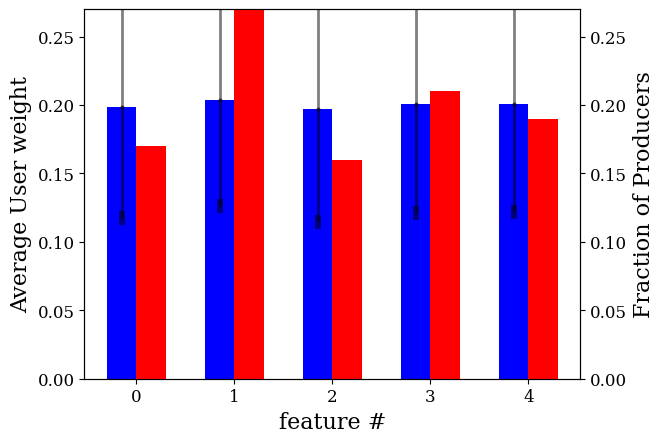

In [90]:
#movielens variation
df_linear = pd.read_pickle("../saved_frames/Movielens100k_grid_linear_statistics.pkl") 
df_softmax = pd.read_pickle("../saved_frames/Movielens100k_grid_softmax_statistics.pkl") 
# dims = [5, 10, 15, 20]
# plot_and_save(dims, df_linear, df_softmax, 'uniformsynth')
d = 5
nprod = 100
seed = 17

df_linear_temp = df_linear[(df_linear['seed'] ==  seed) & (df_linear['dimension'] ==  d) & \
                         (df_linear['nprod'] == nprod)][distributions]
df_softmax_temp = df_softmax[(df_softmax['seed'] ==  seed) & (df_softmax['dimension'] ==  d)\
                           & (df_softmax['nprod'] == nprod)][distributions]

ud_linear, pd_linear = df_linear_temp['user_dist'].item(), df_linear_temp['producer_dist'].item()
ud_softmax, pd_softmax = df_softmax_temp['user_dist'].item(), df_softmax_temp['producer_dist'].item()

np.random.seed(seed=seed)
ue, nue = get_user_embeddings_movielens100k(user_dimension= d)
print(np.allclose(nue.mean(axis=0), ud_linear))

user_producer_2bar_ploterr(pd_linear, nue.mean(axis=0), nue.std(axis=0))

# user_producer_2bar_plot(pd_linear, ud_linear, '../plots/new_plots/uniformsynth_linear_dim5_100prod.pdf')
# user_producer_2bar_plot(pd_softmax, ud_softmax, '../plots/new_plots/uniformsynth_softmax_dim5_100prod.pdf')

# user_producer_2bar_plot_display(pd_linear, ud_linear)
# user_producer_2bar_plot_display(pd_softmax, ud_softmax)

In [86]:
nue.mean(axis=0)

array([0.19856151, 0.20374042, 0.19687945, 0.20039017, 0.20042845])

In [87]:
nue.std(axis=0)

array([0.08106636, 0.07789969, 0.08261759, 0.07959133, 0.07857299])